In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from utils import generate_normal_map
from matplotlib.colors import TwoSlopeNorm
%matplotlib widget
plt.ioff()

In [2]:
data = np.load("data/runs/traj sinus 2025-01-22 16:41 (13.679s).npz", allow_pickle=True)

hm_states = data['hm_states']
vhl_mask = data['vhl_mask']
time = data['time']
param = data["param"]

In [3]:
IS_3D = False

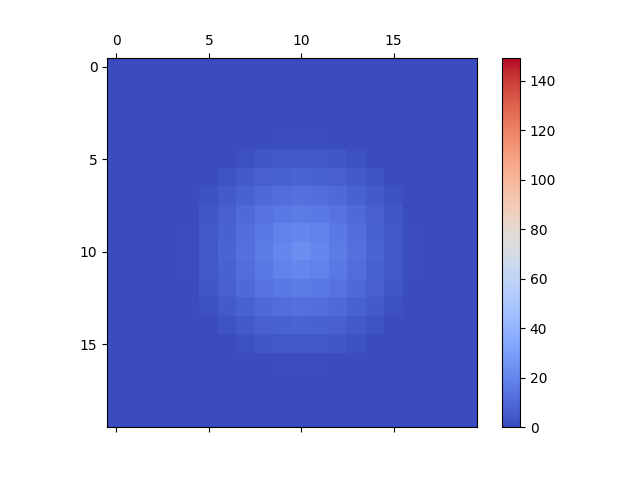

In [4]:

vmin = min([hm[0].min() for hm in hm_states])
vmax = max([hm[0].max() for hm in hm_states])
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
cmap = "coolwarm"


y = np.arange(hm_states[0,0].shape[0])
x = np.arange(hm_states[0,0].shape[1])
x_meshed, y_meshed = np.meshgrid(x, y)

# Créer la figure

fig = plt.figure()
if IS_3D:
    ax = fig.add_subplot(111, projection='3d') 
    cax = ax.plot_surface(x_meshed, y_meshed, hm_states[0,0], cmap=cmap, norm=norm)
    ax.set_zlim(vmin,vmax)
else:
    ax = fig.add_subplot(111)
    cax = ax.matshow(hm_states[0,0], cmap='coolwarm')

    
plt.colorbar(cax)



# Fonction pour mettre à jour l'image à chaque trame
def update(frame):
    global cax
    if IS_3D:
        cax.remove()
        cax = ax.plot_surface(x_meshed, y_meshed, hm_states[frame,0], cmap=cmap, norm=norm)
        
    else:
        cax.set_data(hm_states[frame,0])
    return cax

# Créer l'animation
anim = FuncAnimation(
    fig, update, frames=len(hm_states), interval=100, blit=True
)

# Sauvegarder l'animation
anim.save('height_map_animation.mp4', writer='ffmpeg', fps=10)  # Sauvegarde en MP4
# anim.save('height_map_animation.gif', writer='imagemagick', fps=10)  # Sauvegarde en GIF

plt.show()